# Example power spectrum calculation
In this example, we will calculate the matter power spectrum using a couple of different methods.

In [12]:
import numpy as np
import pyccl as ccl
import pylab as plt
%matplotlib inline

We begin by defining a set of cosmological parameters, as usual:

In [13]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                      transfer_function='boltzmann')

Note that we have explicitly defined how transfer functions should be calculated for the linear matter power spectrum, by using the `transfer_function` keyword argument. The following types of transfer function are available:

In [14]:
print ccl.core.transfer_function_types.keys()

['boltzmann', 'boltzmann_class', 'none', 'emulator', 'fitting_function', 'camb', 'class', 'bbks', 'eisenstein_hu', 'boltzmann_camb']


The default is `boltzmann_class`, which uses a full transfer function calculation from the CLASS Boltzmann code. This is one of the most accurate options at the level of linear pertubation theory, but will be less accurate at non-linear scales.

(To improve precision on non-linear scales, one would eventually choose `emulator`, which will use a suite of fast N-body simulations to model the matter transfer function. This is not currently implemented.)

If we were less interested in precision but wanted to improve speed, we could have chosen the `eisenstein_hu` option instead.

Likewise, the `Cosmology()` object constructor also has a `matter_power_spectrum` argument that can be changed. There is no need to do this for now, however.

### How CCL caches results
Now, we can calculate the linear and non-linear matter power spectra as a function of wavenumber. Before we do that though, let's just perform a quick test to see how CCL caches the results of calculations:

In [15]:
print cosmo.has_power()
print cosmo.has_sigma()

False
False


Both of these status indicators are `False`, showing that CCL hasn't yet computer power spectra (transfer functions) or sigma(R); the cache is currently empty. When we calculate the power spectrum, though, the result will be stored (and splined) for future use.

### Calculate the matter power spectrum
Now, let's calculate the power spectra:

In [16]:
k = np.logspace(-4., 1., 100) # Wavenumber
a = 1. # Scale factor

In [17]:
pk_lin = ccl.linear_matter_power(cosmo, k, a)

In [18]:
pk_nl = ccl.nonlin_matter_power(cosmo, k, a)

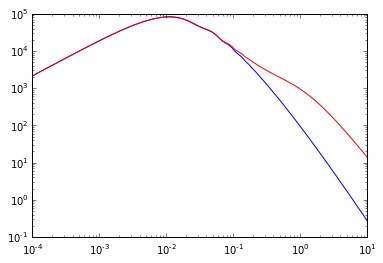

In [19]:
plt.plot(k, pk_lin, 'b-')
plt.plot(k, pk_nl, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.show()

We can see that the cache has now been populated:

In [20]:
print cosmo.has_power()

True


Subsequent calls to `linear_matter_power()` will be faster for the same cosmology (i.e. the same `Cosmology` object).

### Power spectrum normalisation, sigma_8
We can also calculate the normalisation of the power spectrum, sigma_8. Note that this parameter is currently undefined:

In [21]:
print cosmo['sigma_8']

nan


If we now call the `sigma8()` function, this value should be populated (although at present this has not been implemented).

In [22]:
print ccl.sigma8(cosmo)
print cosmo['sigma_8']

0.84006416271
nan
